## Breast Cancer Prediction Project 10

In [1]:
import os as os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
os.getcwd()
pd.set_option('display.max_columns',None)
os.chdir("C:\\Users\\archana\\Desktop\\DSP\\Py")

### Reading Dataset

In [25]:
df_data= pd.read_csv("cancerdata.csv")

In [26]:
df_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [27]:
df_data.shape

(569, 32)

Dataset has 569 observations and 32 columns

In [28]:
df_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,0.420306,1.206972,3.014281,40.337079,0.006921,0.025483,0.031894,0.011796,0.020458,0.003916,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,1.250206e+08,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,0.279339,0.534069,2.070656,45.491006,0.003069,0.017796,0.030186,0.006170,0.008280,0.002670,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,8.670000e+03,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,-0.372471,-0.546491,-4.707076,6.802000,-0.001133,-0.028741,0.000000,0.000000,-0.005896,-0.003879,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,8.692180e+05,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,0.227769,0.822432,1.642622,17.850000,0.004856,0.014254,0.015090,0.007638,0.014591,0.002096,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,9.060240e+05,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,0.417595,1.219510,2.964648,24.530000,0.006996,0.025416,0.025890,0.010930,0.020653,0.003928,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,8.813129e+06,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,0.625950,1.549142,4.341242,45.190000,0.009152,0.037804,0.042050,0.014710,0.026359,0.005818,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,9.113205e+08,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,1.461752,2.786341,8.611148,542.200000,0.015543,0.075790,0.396000,0.052790,0.042971,0.011591,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [29]:
len(df_data.describe().columns)

31

Out of the 32 columns, 31 are numeric in nature. Only diagnosis is character 

### Removing id column, which is irrelevant for analysis

In [30]:
df_data.drop('id',axis=1,inplace=True)

In [31]:
df_data.shape

(569, 31)

### Checking missing values

In [32]:
df_data.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
smoothness_se              0
symmetry_worst             0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
diagnosis                  0
dtype: int64

There are no missing values in the dataset.

### Label-Encoding to convert categorical data

In [36]:
df_data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

In [37]:
df_data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [38]:
label =LabelEncoder()
df_data.diagnosis =label.fit_transform(df_data.diagnosis.values)

In [39]:
df_data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

diagnosis is now having numeric data , 0-B and 1-M

### Splitting the dataset into train and test

In [71]:
X= df_data.drop('diagnosis',axis=1)
y= df_data['diagnosis']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(381, 30) (188, 30) (381,) (188,)


### KNN Implementation and checking accuracy of model for different values of k


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(1,25,2):
    knn_model=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_model.fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    print("Accuracy is :",accuracy_score(y_pred,y_test)*100,"for K-value:",k)

Accuracy is : 93.08510638297872 for K-value: 1
Accuracy is : 94.14893617021278 for K-value: 3
Accuracy is : 93.61702127659575 for K-value: 5
Accuracy is : 96.80851063829788 for K-value: 7
Accuracy is : 97.3404255319149 for K-value: 9
Accuracy is : 96.80851063829788 for K-value: 11
Accuracy is : 97.87234042553192 for K-value: 13
Accuracy is : 97.3404255319149 for K-value: 15
Accuracy is : 96.80851063829788 for K-value: 17
Accuracy is : 97.3404255319149 for K-value: 19
Accuracy is : 97.3404255319149 for K-value: 21
Accuracy is : 96.27659574468085 for K-value: 23


Highest Accuracy is : 97.87234042553192 for K-value: 13. Lets perform k fold cross validation to confirm the optimum k value

### Cross Validation -optimizing the number of neighbours

In [102]:
cv_scores=[]
neighbors=[]
auc_scores= []
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
for k in range(1,25,2):
    neighbors.append(k)
    cv_model =KNeighborsClassifier(n_neighbors=k,weights='distance')
    scores = cross_val_score(cv_model,X_train,y_train,cv=10,scoring='accuracy')
    print("CV score is ",scores.mean() ,"for K-value :" ,k)
    cv_scores.append(scores.mean())
    
    cv_model.fit(X_train,y_train)
    y_pred= cv_model.predict(X_test)
    auc_scores.append(roc_auc_score(y_pred,y_test))

CV score is  0.8946711894080316 for K-value : 1
CV score is  0.8943265127475654 for K-value : 3
CV score is  0.9075591786118101 for K-value : 5
CV score is  0.9075591786118101 for K-value : 7
CV score is  0.9076977787504102 for K-value : 9
CV score is  0.9131031841558157 for K-value : 11
CV score is  0.9157347631031841 for K-value : 13
CV score is  0.9050661998030419 for K-value : 15
CV score is  0.8971678155888683 for K-value : 17
CV score is  0.8997319181529708 for K-value : 19
CV score is  0.9023634971003393 for K-value : 21
CV score is  0.8997319181529708 for K-value : 23


Highest CV score is  0.9157347631031841 for K-value : 13

### MisClassification Error

In [87]:
MSE = [1-x for x in cv_scores]
neighbors[MSE.index(min(MSE))]

#or neighbors[cv_scores.index(max(cv_scores))]

13

Lowest MisClassification Error or Highest accuracy is for k value =13

### Visualization of MisClassification Error vs k

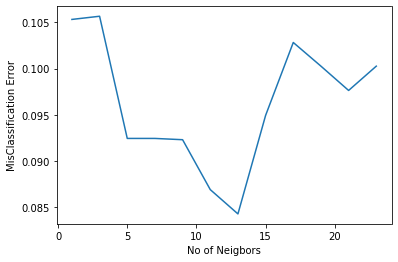

In [93]:
import matplotlib.pyplot as plt
plt.plot(neighbors,MSE)
plt.xlabel("No of Neigbors")
plt.ylabel("MisClassification Error")
plt.show()

#### From the plot , clearly optimal value of k is 13

### Visualisation of AUC Scores vs k

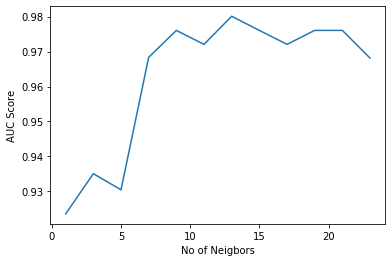

In [103]:
plt.plot(neighbors,auc_scores)
plt.xlabel("No of Neigbors")
plt.ylabel("AUC Score")
plt.show()

#### From the plot, maximum AUC score is for k value=13